Question: Is there a positive correlation between vote_average and revenue for the top most popular films? Without even looking at the data, one could infer that there would be a high positive correlation between the voter average and revenue for popular movies. If people like the movie, then that movie must have earned a strong revenue, right? Let's confirm this assumption with a scatterplot that looks at the relationship between tehse two variables. 



In [77]:
import pandas as pd

In [78]:
total_df = pd.read_csv('Moviesdata_revenue.csv')

In [79]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 12 columns):
Unnamed: 0           9998 non-null int64
popularity           9998 non-null float64
vote_count           9998 non-null int64
video                9998 non-null bool
id                   9998 non-null int64
adult                9998 non-null bool
original_language    9998 non-null object
genre_ids            9998 non-null object
title                9998 non-null object
vote_average         9998 non-null float64
release_date         9970 non-null object
revenue              9998 non-null int64
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 800.7+ KB


In [84]:
# Drop the column 'Unnamed: 0' to clean up our data

total_df = total_df.drop(['Unnamed: 0'], axis=1)

In [85]:
total_df.head()

,popularity,vote_count,video,id,adult,original_language,genre_ids,title,vote_average,release_date,revenue
0,3130.643,143,False,528085,False,en,"[18, 878, 53]",2067,5.8,2020-10-01,0
1,1724.443,114,False,741067,False,en,"[28, 12, 18, 53]",Welcome to Sudden Death,6.6,2020-09-29,0
2,1312.131,2131,False,497582,False,en,"[80, 18, 9648]",Enola Holmes,7.6,2020-09-23,0
3,884.914,142,False,724989,False,en,"[28, 53]",Hard Kill,4.7,2020-08-25,0
4,850.491,150,False,694919,False,en,[28],Money Plane,5.9,2020-09-29,0


By looking at the first 5 rows alone, we see that there are rows in our dataset that contain revenue values of 0. This makes sense, since these 5 films' release dates are in 2020, so revenue figures may not have been generated yet. First, let's see what happens to our dataset when we drop films that have a revenue equal to 0. 

In [87]:
total_df = total_df[total_df['revenue'] != 0]

In [90]:
total_df.shape

(5101, 11)

This has cut our dataset in half. However, we still have a large amount of data to work with. To take a closer look at this relationship, let's first look at the relationship for the films with the highet amount of revenues. For this exercise, we will take a subset of our dataset, i.e. only 1,000 movies. We are using a subset of the top revenue to investigate our question, as we would expect that films with the highest revenues would have the highest vote_average. Let's find out if this is actually true. 

In [124]:
# Let's simplify our table so we can focus on the columns that are relevant to answering this question. 
total_df = total_df.loc[:, ['id', 'title', 'vote_average', 'release_date', 'revenue']].sort_values(by=['revenue'], ascending=False)
total_df = total_df.iloc[0:1000]
total_df.shape

(1000, 5)

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by looking at a basic scatterplot to see if there is any obvious correlation. 

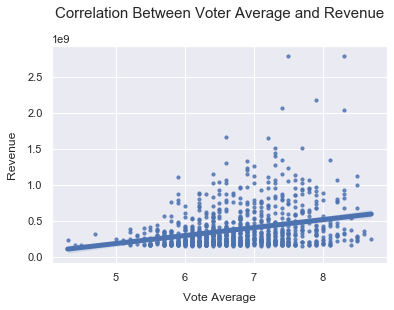

In [166]:
sns.set(font_scale=1.0, color_codes=True)
fig,ax = plt.subplots()
sns.regplot(data=total_df, x="vote_average", y="revenue", ax=ax, marker='o', scatter_kws={"s": 10}, line_kws={"lw":5})

plt.xlabel('Vote Average',labelpad=10)
plt.ylabel('Revenue',labelpad=10)
plt.title('Correlation Between Voter Average and Revenue', y=1.1, fontsize=15)
          
plt.show()

This result is not overly surprising; we see the regression line that is positive and upward sloping; meaning that voter average and revenue have a positive, linear relationship. We can also see that for extreme cases, where revenues are extremely high (over 2.0), these films have a vote averages of 7+. So, we can conclude that for this subset of data, popular films with higher revenues do tend to have higher vote averages. 

To explore this further, we will take a look at the frequency of vote averages across these 1,000 films. Vote averages are analyzed on a 0-10 scale. We can predict that, based on our assumptions and the results of the scatterplot above, that these films with top revenue values will show high frequency values for higher vote averages. Let's create a histogram to investigate whether this is true. 

Text(0, 0.5, 'Frequency')

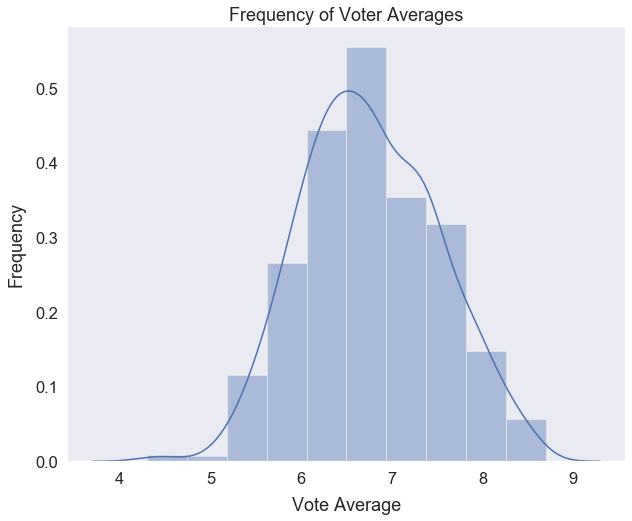

In [184]:
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(total_df.vote_average, bins=10, ax=ax)

sns.set(font_scale=1.5, style="dark")

plt.title('Frequency of Voter Averages')
plt.xlabel('Vote Average',labelpad=10)
plt.ylabel('Frequency',labelpad=10)

The most frequent vote averages for high revenue films are between 6.0 and 7.0. This result is exactly as we would have predicted; high revenue films typically do have high vote averages, and this is evident from the frequency of high vote averages within this subset of data. 